<center> 
    <img src="./logo_UTN.svg" height=”250” width=200”>
</center>

<h1><center> TAREA SEMANAL 5 <center></h1>
    <h2><center> TEORIA DE LOS CIRCUITOS 2<center></h2>
    <h3>Destefano, Martin</h3>

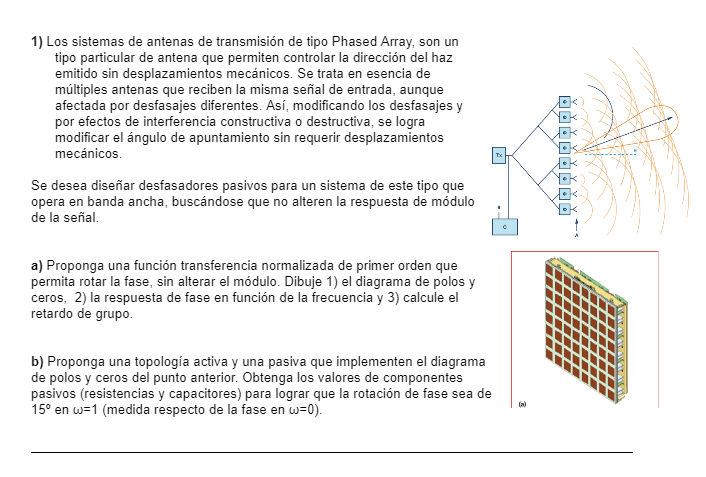

Como vimos en la TS1, el rotador de fase tiene una transferencia: 

$$ T(S) = \frac{S-z_{1}}{S+p_{1}} $$

Como el ejercicio no los pide normalizado: 

$$ T(S) = \frac{S-\omega_{0}}{S+\omega{0}} = \frac{S-1}{S+1} $$

Ubicados en en el mismo radio tendremos un polo en el semiplano izquierdo y un cero en el semiplano derecho: 

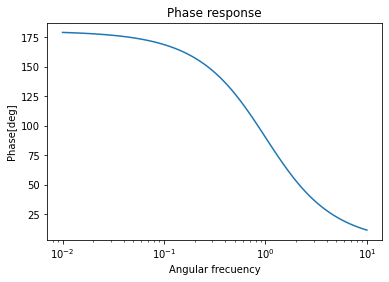

(1, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

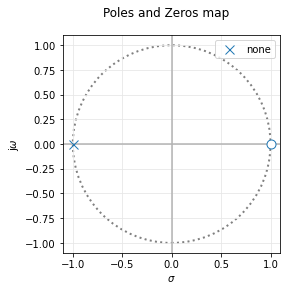

In [5]:
import splane as sp 
import scipy.signal as sig
import matplotlib.pyplot as plt 
Transfer = sig.TransferFunction([1,-1],[1,1])


w, mag, phase = sig.bode(Transfer)
plt.figure()
plt.title('Phase response')
plt.xlabel('Angular frecuency')
plt.ylabel('Phase[deg]')
plt.semilogx(w, phase)  # Fase
plt.show()

sp.pzmap(Transfer)


Finalmente calculamos el retardo de grupo siendo: 

La funcion de la fase: 
$$ \varphi = \pi - 2 tan^{-1}(\omega) $$

$$ -\frac{\partial\varphi}{\partial\omega} = \frac{2}{1+\omega^2} $$

Para el punto B proponemos dos topologias

Para la topologia pasiva, optamos por el circuito Lattice 

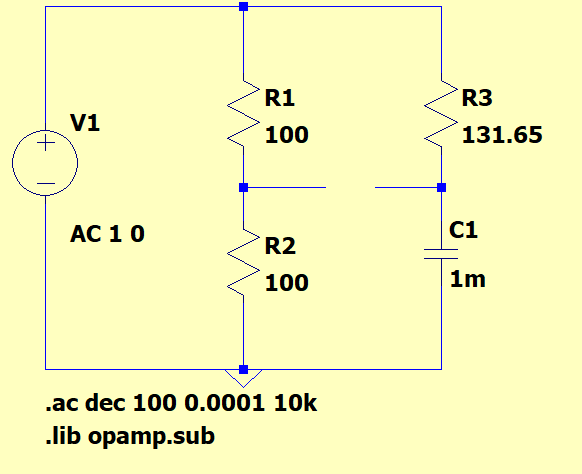

Para la topologia activa, optamos por el siguiente circuito: 

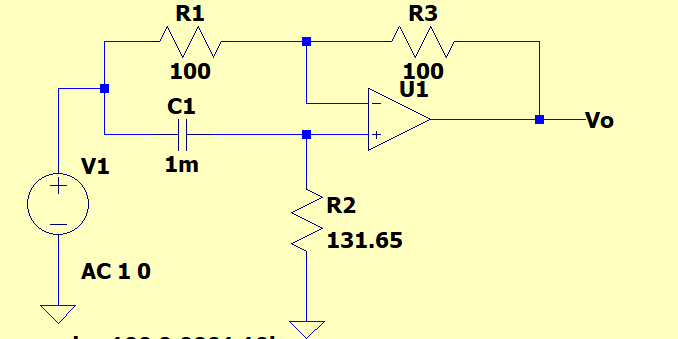

Finalmente para las caracteristicas de fase requeridas: 

Simulaciones: 
Circuito pasivo: 

Lo interesante del pasivo que la tension de salida la medimos de forma diferencial

Podemos observar como la fase se reduce 15° con respecto a $\omega_{0} = 0 $ en $\omega_{0} = 1$ que en el eje de frecuencia convertida es aproximadamente 159mHz

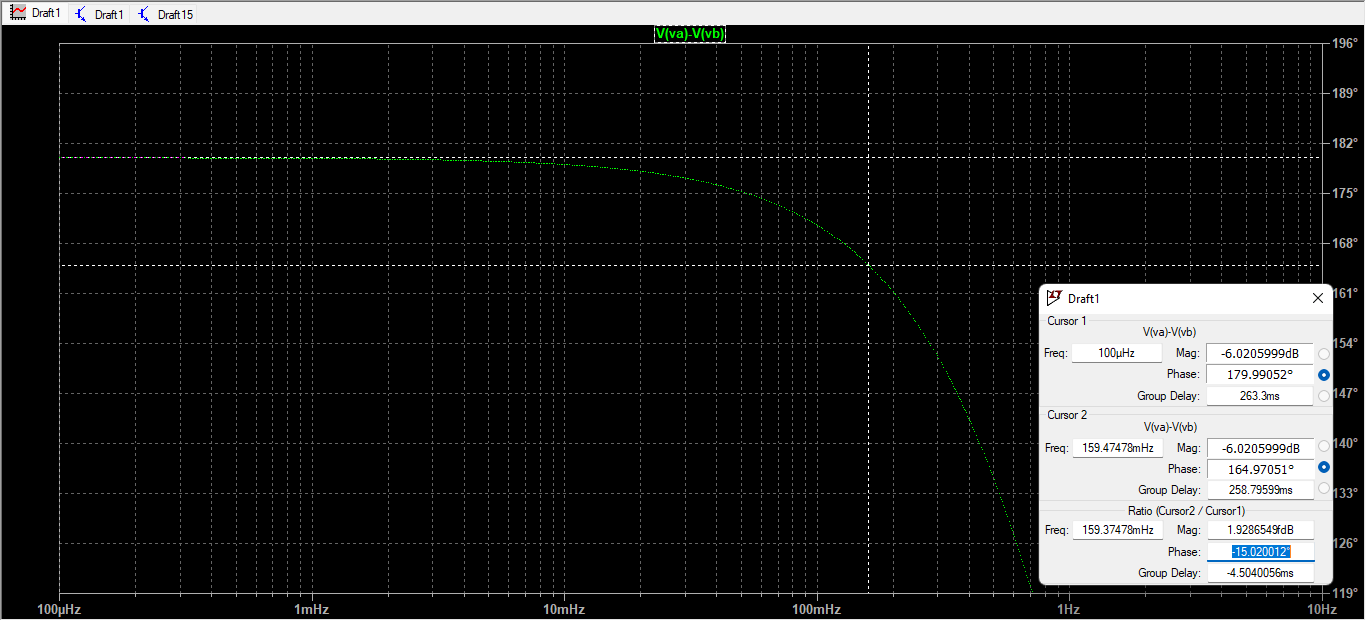

Circuito activo: 

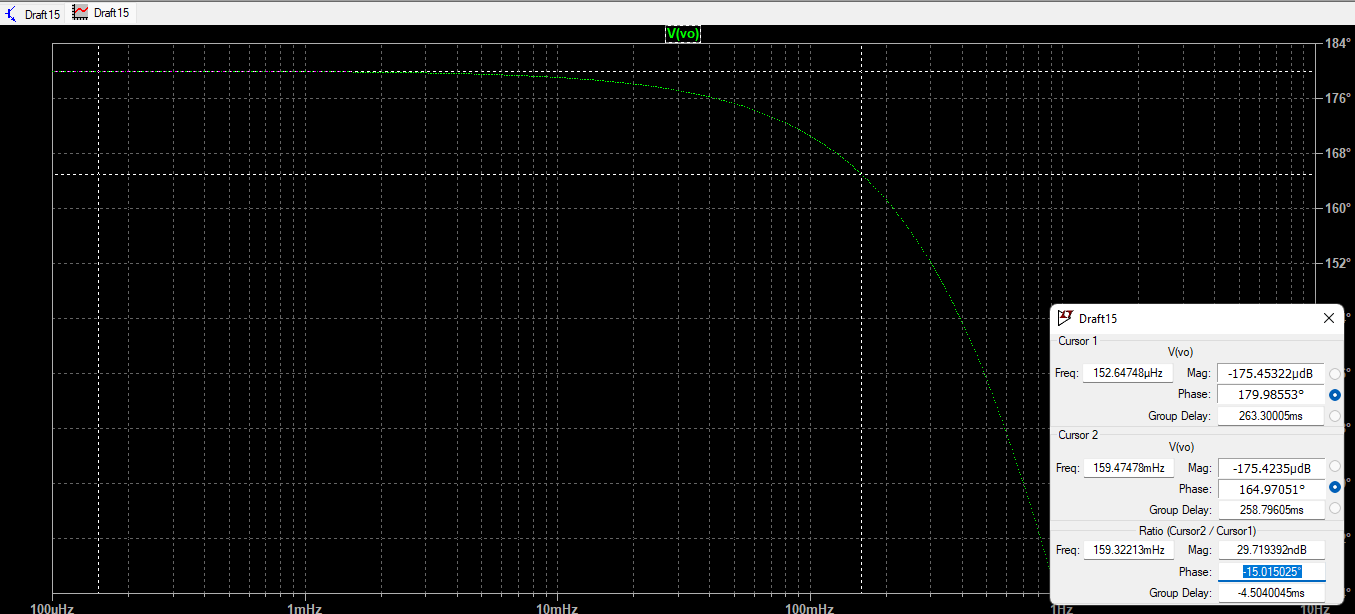

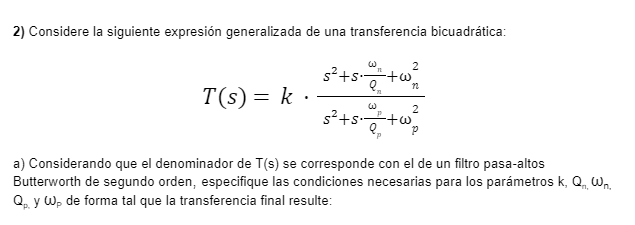
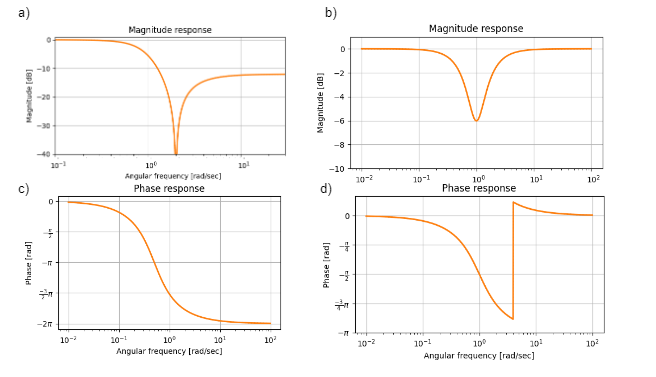

Punto A) a) Lo identifico como un filtro Notch pasabajos, cuya transferencia se caracteriza como: 

$$ T(S) = \frac{S^2 + \omega_{z}^2}{S^2+S\frac{\omega_{p}}{Q_{p}}+\omega_{p}^2} $$

La caracteristica de este filtro son ceros en el infinito, por lo tanto el grafico de magnitud se vera afectado primero por los polos, que generan una pendiente negativa en $ \omega_{p} $ que se realza cuando se alcanza el cero. Ademas en $\omega = 0$ la ganancia deberia ser 0dB, pero $ \omega_{p} \not= \omega_{z} $. 
Por lo que tendremos que compensar esa ganancia para que sea la transferencia deseada, los valores son los siguientes: 

$$ \omega_{z} = 2 $$ 
$$ \omega_{p} = 1 $$ 
$$ K = 1/4 $$ 
$$ Q_{z} -> \inf $$ 
$$ Q_{p} = \frac{1}{\sqrt{2}} $$ 

Simulacion: 

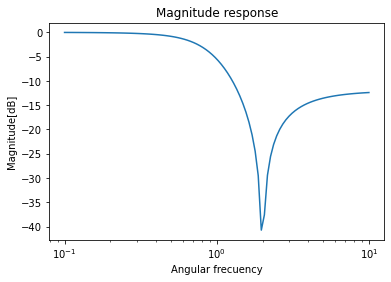

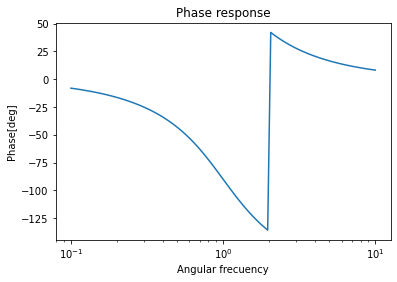

In [20]:
import numpy as np 
import scipy.signal as sig 
import math as m
import splane as sp
k = 1/4
myFilter_hand = sig.TransferFunction([k*1,0,k*2**2], [1,m.sqrt(2),1])

w, mag, phase = sig.bode(myFilter_hand)
plt.figure()
plt.title('Magnitude response')
plt.xlabel('Angular frecuency')
plt.ylabel('Magnitude[dB]')
plt.semilogx(w, mag)  # Fase
plt.show()

plt.figure()
plt.title('Phase response')
plt.xlabel('Angular frecuency')
plt.ylabel('Phase[deg]')
plt.semilogx(w, phase)  # Fase
plt.show()


Punto A) b) Parece ser un filtro Notch pero en realidad es un elimina banda "comun", puede notarse por la selectividad o la atenuacion, que es mucho menor que si fuese un filtro de caracteristicas Notch. 

$$ T(S) = \frac{S^2+S\frac{\omega_{z}}{Q_{z}}+\omega_{z}^2}{S^2+S\frac{\omega_{p}}{Q_{p}}+\omega_{p}^2} $$

En este caso necesito que en $ \omega = 1 $ la transferencia valga 1/2 para tener -6dB en el diagrama de bode, por lo tanto el coeficiente $ \frac{\omega_{z}}{Q_{z}} $ debe ser la mitad que $\frac{\omega_{p}}{Q_{p}}$, en formulas: 

$$ \frac{\sqrt{(\frac{\omega_{z}}{Q_{z}})^2+(1-\omega_{z}^2)^2}}{\sqrt{(\frac{\omega_{p}}{Q_{p}})^2+(1-\omega_{p}^2)^2}} $$
Por lo que los componentes me quedan:  

$$ \omega_{z} = 1 $$ 
$$ \omega_{p} = 1 $$ 
$$ K = 1 $$ 
$$ Q_{p} = \frac{2}{\sqrt{2}}$$ 
$$ Q_{p} = \frac{1}{\sqrt{2}} $$ 

Simulacion: 

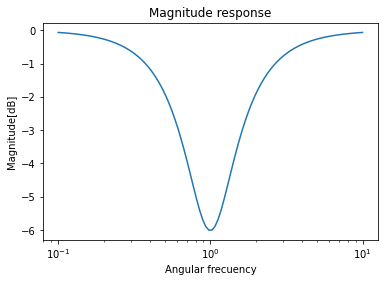

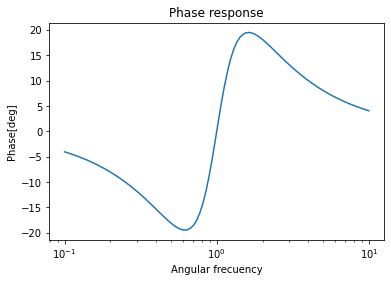

In [21]:

import numpy as np 
import scipy.signal as sig 
import math as m
import splane as sp
import matplotlib.pyplot as plt
k = 1/4
myFilter_hand = sig.TransferFunction([1,m.sqrt(2)/2,1], [1,m.sqrt(2),1])

w, mag, phase = sig.bode(myFilter_hand)
plt.figure()
plt.title('Magnitude response')
plt.xlabel('Angular frecuency')
plt.ylabel('Magnitude[dB]')
plt.semilogx(w, mag)  # Fase
plt.show()

plt.figure()
plt.title('Phase response')
plt.xlabel('Angular frecuency')
plt.ylabel('Phase[deg]')
plt.semilogx(w, phase)  # Fase
plt.show()


Punto A) c) La respuesta de fase de este punto al ser de 0 -> $2\pi$ nos da a entender que estamos ante un pasatodo de segundo orden, por lo tanto: 
 
$$ T(S) = \frac{S^2-S\frac{\omega_{z}}{Q_{z}}+\omega_{z}^2}{S^2+S\frac{\omega_{p}}{Q_{p}}+\omega_{p}^2} $$

Notamos que la fase para $\omega = 1$ vale -3/2$\pi$, por lo que a traves de la funcion de fase, podemos calcular cuanto vale $\omega_{p} = \omega_{z}$ 

$$ \phi(\omega) = -2 tan^{-1}(\frac{\omega\omega_{p}/Q_{p}}{\omega_{p}^2-\omega^2}) $$

Usando esta funcion, sabemos que $\omega_{p} = 0.5$

$$ \omega_{z} = 1 $$ 
$$ \omega_{p} = 1 $$ 
$$ K = 1 $$ 
$$ Q_{p} = \frac{2}{\sqrt{2}}$$ 
$$ Q_{p} = \frac{1}{\sqrt{2}} $$ 

Simulacion: 